In [1]:
import numpy as np
import cv2
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load preprocessed data for DNN
file_path = '/content/drive/MyDrive/NLP_Workspace/Data/'

df_data = pd.read_csv(file_path + "post_vectorized.csv")
df_label = pd.read_csv(file_path + "post_labels.csv")


# with open(file_path + 'post_vectorized.csv', 'r') as file:
#   csvreader = csv.reader(file)
#   example = 0
#   for row in csvreader:
#     if example == 0:
#       example += 1
#     else:
#       if example == 1:
#         print(row)
#       #fetched_data[example] = np.array([float(x) for x in row[1]].append(row[3]))
#       example+=1

In [3]:
df_data.head(10)

0         1         2         3         4         5         6  \
0  0.065186  0.810913 -0.424438  0.985718 -0.627441  0.018433  0.271118   
1  0.556641  0.122620 -0.147461  0.620117 -0.356201 -0.105072 -0.055115   
2  0.234177  0.639679  0.128906  0.872681 -2.454506  0.057007  1.116470   
3  0.630447  0.592880 -0.062744  0.198242 -0.404785 -0.137329  0.169678   
4 -0.179688  0.057129  0.141602 -0.077148 -0.092285 -0.013855  0.080078   
5  0.312500 -0.192627  0.058594 -0.112793 -0.391602  0.222595  0.185303   
6  0.533936  0.621124 -0.177536  1.965210 -0.987487 -0.034241  1.383789   
7  1.643814 -0.355835  0.518753  1.162415 -2.287108  0.753159  1.581055   
8  1.066895 -0.394135 -0.308594  0.273926 -1.667480  0.356689  0.220459   
9  0.537674  0.699585  0.041138  0.946472 -0.364075  0.326569  1.025269   

          7         8         9  ...       290       291       292       293  \
0 -1.772049  1.621460  1.295776  ... -1.770142  1.515503 -1.993652  0.281433   
1  0.954971  0.568359  0.516357  ...  0.325195  0.490723 -0.563477 -0.581055   
2 -0.437820  0.722595  1.275543  ... -1.445496  1.002930 -0.411072  0.111328   
3 -0.684570  1.182190  0.313721  ... -0.662598  0.905273 -0.552734  0.606445   
4 -0.049561 -0.009766  0.390625  ... -0.320312 -0.093262  0.263672  0.066406   
5 -0.129150 -0.002441  0.417969  ...  0.458008  0.350586  0.109863  0.170410   
6 -1.526917  0.338135  1.732788  ... -1.012123  1.886536 -1.540375  0.380615   
7 -1.347565  1.319330 -0.141113  ...  0.389549  1.424316 -1.533081 -1.108475   
8 -0.922455  0.169861  0.500824  ...  0.588013  0.586792 -1.630371 -1.266479   
9 -0.285400  1.053528  0.738892  ... -0.605591  0.874939 -1.270996  0.315186   

        294       295       296       297       298       299  
0 -0.813477 -0.765564  0.453857  0.092773  0.160400 -0.644424  
1  0.157715  0.022217  0.598633 -0.303467 -0.288818 -0.311279  
2 -0.455597  0.569593  1.221680 -0.642319 -0.028374 -0.479736  
3 -0.595337 -0.458984 -0.046387 -0.781006 -0.011658 -0.458740  
4  0.237305  0.039795 -0.045166  0.074707  0.056396  0.022095  
5 -0.200684 -0.465820  0.053955 -0.453613 -0.133301  0.287109  
6 -0.617554 -0.146713  0.549286 -0.521436  0.006592  0.264893  
7 -0.923706 -0.501244  0.647461  0.606812  0.163330  0.449707  
8  0.009888  0.062389  0.465332 -0.299805  0.745239  0.314453  
9 -0.692139  0.064209 -0.690796 -0.158691  0.290344 -0.555664  

[10 rows x 300 columns]

In [4]:
df_label.describe()

0
count  198653.000000
mean        7.495870
std         4.610907
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        15.000000

In [5]:
df_label.head(10)

0
0  0
1  0
2  0
3  0
4  0
5  0
6  0
7  0
8  0
9  0

In [6]:
fetched_data = df_data.to_numpy()
len(fetched_data), len(fetched_data[0])

(198653, 300)

In [7]:
Labels = df_label.to_numpy().flatten()
len(Labels), Labels[0]

(198653, 0)

In [8]:
Labels

array([ 0,  0,  0, ..., 15, 15, 15])

In [9]:
LENGTH_DATA = len(df_label)

import random
train_example_nums = int(0.85 * LENGTH_DATA)
test_example_nums = int(0.15 * LENGTH_DATA)

random_ids = [i for i in range(LENGTH_DATA)]
random.Random(4).shuffle(random_ids)

random_train_ids = random_ids[:train_example_nums]
random_test_ids = random_ids[train_example_nums:]

print(len(random_train_ids), len(random_test_ids))


X_train = torch.as_tensor(fetched_data[random_train_ids])
Y_train = torch.as_tensor(Labels[random_train_ids]).type(torch.int64)

X_test = torch.as_tensor(fetched_data[random_test_ids])
Y_test = torch.as_tensor(Labels[random_test_ids]).type(torch.int64)

168855 29798


In [10]:
print(X_test)

tensor([[ 1.2765,  0.1227,  0.0628,  ..., -0.3349, -0.6470,  0.3520],
        [-0.3679,  0.2446,  0.4951,  ..., -0.3325, -0.3469,  0.2645],
        [ 0.3435,  1.2190,  0.2255,  ..., -0.8652, -0.1610,  0.5707],
        ...,
        [ 0.7028,  0.3275,  0.4874,  ..., -0.4741,  0.6226,  0.0878],
        [ 0.8999,  0.1882, -0.2239,  ..., -0.7469,  0.0232, -0.6613],
        [ 0.6193,  0.3770,  0.8020,  ..., -0.5311,  0.3671,  0.8548]],
       dtype=torch.float64)


In [11]:
print(Y_test)

tensor([ 3, 14,  9,  ...,  2,  6,  4])


In [12]:
class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, Y):
    self.labels = Y
    self.posts = X

  def __len__(self):
    return len(self.posts)

  def __getitem__(self, index):
    post = self.posts[index]
    label = self.labels[index]
    return post, label

In [13]:
train_dataset = Dataset(X_train, Y_train)
test_dataset = Dataset(X_test, Y_test)

print(min(Y_train), max(Y_train))
print(Y_test)

tensor(0) tensor(15)
tensor([ 3, 14,  9,  ...,  2,  6,  4])


In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [15]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [16]:
device = get_default_device()
device

device(type='cpu')

In [17]:
class ClassificationBase(nn.Module):
    def training_step(self, batch):
        posts, labels = batch 
        out = self(posts.type(torch.FloatTensor).to(device))                  # Generate predictions
        loss = F.cross_entropy(out, labels.to(device)) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        posts, labels = batch
        out = self(posts.type(torch.FloatTensor).to(device))                    # Generate predictions
        loss = F.cross_entropy(out, labels.to(device))   # Calculate loss
        acc = accuracy(out, labels.to(device))           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [18]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr, momentum = 0.9)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [19]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [20]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [21]:
class DNN(ClassificationBase):
  def __init__(self) -> None:
    super().__init__()
    self.fc1 = torch.nn.Linear(300, 256)
    self.fc2 = torch.nn.Linear(256, 128)
    self.fc3 = torch.nn.Linear(128, 128)
    self.fc4 = torch.nn.Linear(128, 128)
    self.fc5 = torch.nn.Linear(128, 16)


  def forward(self, x: torch.Tensor) -> torch.Tensor:     
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    x = F.relu(x)
    x = self.fc5(x)
    return x

In [22]:
model = DNN()
model.to(device)


DNN(
  (fc1): Linear(in_features=300, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=16, bias=True)
)

In [23]:
batch_size = 32

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, num_workers=1, shuffle = True, pin_memory=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size*4, num_workers=1, pin_memory=True)

In [24]:
history = [evaluate(model, test_dataloader)]
history

[{'val_loss': 2.774369239807129, 'val_acc': 0.062492769211530685}]

In [25]:
history += fit(20, 0.0001 , model, train_dataloader, test_dataloader)

Epoch [0], val_loss: 2.7733, val_acc: 0.0628
Epoch [1], val_loss: 2.7727, val_acc: 0.0643
Epoch [2], val_loss: 2.7725, val_acc: 0.0654
Epoch [3], val_loss: 2.7723, val_acc: 0.0663
Epoch [4], val_loss: 2.7721, val_acc: 0.0672
Epoch [5], val_loss: 2.7719, val_acc: 0.0696
Epoch [6], val_loss: 2.7717, val_acc: 0.0710
Epoch [7], val_loss: 2.7715, val_acc: 0.0739
Epoch [8], val_loss: 2.7712, val_acc: 0.0779
Epoch [9], val_loss: 2.7709, val_acc: 0.0781
Epoch [10], val_loss: 2.7706, val_acc: 0.0795
Epoch [11], val_loss: 2.7701, val_acc: 0.0790
Epoch [12], val_loss: 2.7696, val_acc: 0.0795
Epoch [13], val_loss: 2.7690, val_acc: 0.0798
Epoch [14], val_loss: 2.7681, val_acc: 0.0811
Epoch [15], val_loss: 2.7672, val_acc: 0.0812
Epoch [16], val_loss: 2.7659, val_acc: 0.0822
Epoch [17], val_loss: 2.7643, val_acc: 0.0838
Epoch [18], val_loss: 2.7621, val_acc: 0.0856
Epoch [19], val_loss: 2.7595, val_acc: 0.0864


In [26]:
history += fit(20, 0.00001 , model, train_dataloader, test_dataloader)

Epoch [0], val_loss: 2.7592, val_acc: 0.0864
Epoch [1], val_loss: 2.7589, val_acc: 0.0865
Epoch [2], val_loss: 2.7586, val_acc: 0.0866
Epoch [3], val_loss: 2.7583, val_acc: 0.0869
Epoch [4], val_loss: 2.7580, val_acc: 0.0868
Epoch [5], val_loss: 2.7577, val_acc: 0.0870
Epoch [6], val_loss: 2.7573, val_acc: 0.0867
Epoch [7], val_loss: 2.7570, val_acc: 0.0872
Epoch [8], val_loss: 2.7567, val_acc: 0.0873
Epoch [9], val_loss: 2.7564, val_acc: 0.0873
Epoch [10], val_loss: 2.7561, val_acc: 0.0872
Epoch [11], val_loss: 2.7557, val_acc: 0.0873
Epoch [12], val_loss: 2.7554, val_acc: 0.0880
Epoch [13], val_loss: 2.7551, val_acc: 0.0877
Epoch [14], val_loss: 2.7548, val_acc: 0.0879
Epoch [15], val_loss: 2.7545, val_acc: 0.0880
Epoch [16], val_loss: 2.7542, val_acc: 0.0880
Epoch [17], val_loss: 2.7538, val_acc: 0.0883
Epoch [18], val_loss: 2.7535, val_acc: 0.0882
Epoch [19], val_loss: 2.7532, val_acc: 0.0884


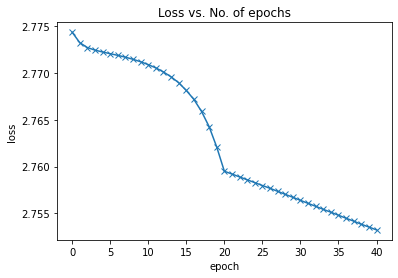

In [27]:
plot_losses(history)

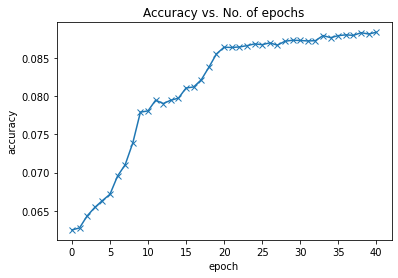

In [28]:
plot_accuracies(history)

In [29]:
evaluate(model, test_dataloader)

{'val_loss': 2.7532126903533936, 'val_acc': 0.08838650584220886}

In [30]:
torch.save(model.state_dict(), 'emotion_classification-feedforward.pth')